!!! use GPU

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q
# prevent ultralytics from tracking your activity
!yolo settings sync=False
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


In [ ]:
# Mount your Google Drive.
# from google.colab import drive
# drive.mount("/drive", force_remount=True)
# PATH_TO_YOUR_TOKEN = "/drive/MyDrive/CS230_group_project/kaggle.json"

# !rm -rf ~/.kaggle
# !mkdir ~/.kaggle
# ! cp $PATH_TO_YOUR_TOKEN ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# ! mkdir -p /kaggle
# ! cp $PATH_TO_YOUR_TOKEN /kaggle/
# ! chmod 600 /kaggle/kaggle.json

# Unmount Drive after retrieving kaggle.json
# drive.flush_and_unmount()

In [ ]:
# ! pip install -q kaggle

# ! kaggle datasets download kapturovalexander/fruits-by-yolo-fruits-detection
# ! unzip "/content/fruits-by-yolo-fruits-detection.zip" -d kaggle_data


In [ ]:
# a more stable version of python
# !pip install numpy==1.26.4 --force-reinstall
# !pip install --upgrade --no-cache-dir ultralytics

In [ ]:
!pip install roboflow

from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
# download data from universe
rf = Roboflow(api_key="PUU6c2RpSfhKb7sNQ7KU")
project = rf.workspace("fruitsdetection").project("fruits-by-yolo")
version = project.version(1)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits-by-YOLO-1 in yolov8-obb:: 100%|██████████| 5960/5960 [00:00<00:00, 8233.49it/s]


In [ ]:
# create path to train/dev/test
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
data['train'] = '../train/images'
data['val'] = '../valid/images'
data['test'] = '../test/images'
if 'path' in data:
  del data['path']
with open(f'{dataset.location}/data.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)

In [ ]:
# train a yolo object detection model
model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=10, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.227 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/Fruits-by-YOLO-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning /content/Fruits-by-YOLO-1/train/labels.cache... 2697 images, 6 backgrounds, 579 corrupt: 100%|██████████| 2697/2697 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Fruits-by-YOLO-1/train/images/Image_100_jpg.rf.63d8f5989a117bdfcab7ffc88666bbb9.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0902      1.0217]
train: WARNING ⚠️ /content/Fruits-by-YOLO-1/train/images/Image_100_jpg.rf.9cb30dc0ec1cb1493641403b6c0cb936.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0163]
train: WARNING ⚠️ /content/Fruits-by-YOLO-1/train/images/Image_10_jpg.rf.41b514113368a05ebebcd8bee8eebb3b.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0442       1.038]
train: WARNING ⚠️ /content/Fruits-by-YOLO-1/train/images/Image_10_jpg.rf.722f9a8c9837871b14e8ee802cee966f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0451      1.0451]
train: WARNING ⚠️ /content/Fruits-by-YOLO-1/train/images/Image_11_jpg.rf.8315e682749993f4f949f35e82531d96.jpg: ignoring corrupt image/label: non-normalized or out of 


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Fruits-by-YOLO-1/valid/labels.cache... 187 images, 1 backgrounds, 39 corrupt: 100%|██████████| 187/187 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Fruits-by-YOLO-1/valid/images/Image_17_jpg.rf.ec66c4cd8c4cc0f066cebed712cdf239.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1213]
val: WARNING ⚠️ /content/Fruits-by-YOLO-1/valid/images/Image_23_png.rf.009e5303445e3ae64be2d1eee31c0aff.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [       1.01]
val: WARNING ⚠️ /content/Fruits-by-YOLO-1/valid/images/Image_25_jpg.rf.026ff8d6042a2375319212252d13fec3.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1107      1.0991]
val: WARNING ⚠️ /content/Fruits-by-YOLO-1/valid/images/Image_32_jpg.rf.54cfddbdfe6885ab87974a3d102ae393.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1367]
val: WARNING ⚠️ /content/Fruits-by-YOLO-1/valid/images/Image_32_jpg.rf.a154f76303a336cf8763c5b3a1f4cc65.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0354]
val

Plotting labels to runs/obb/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.63G      1.296      3.017      2.595          9        640: 100%|██████████| 133/133 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        148        341      0.397      0.571      0.445      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.62G      1.127      1.862      2.325         10        640: 100%|██████████| 133/133 [00:37<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        148        341      0.572      0.579      0.596      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.62G      1.084      1.504       2.26         19        640: 100%|██████████| 133/133 [00:37<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        148        341      0.517      0.689      0.653      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       3.6G      1.027       1.34      2.162         12        640: 100%|██████████| 133/133 [00:37<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        148        341      0.693      0.608      0.684      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.62G      1.014      1.199      2.153         20        640: 100%|██████████| 133/133 [00:37<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        148        341      0.693      0.668      0.657      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.64G     0.9608      1.051      2.067         17        640: 100%|██████████| 133/133 [00:37<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        148        341      0.673      0.636       0.67      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.64G     0.9366     0.9742       2.04          8        640: 100%|██████████| 133/133 [00:38<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        148        341       0.64       0.72      0.705        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.62G     0.8959     0.9052      2.022          8        640: 100%|██████████| 133/133 [00:37<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.10it/s]

                   all        148        341      0.627      0.714       0.72      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       3.6G      0.862     0.8389      1.953          9        640: 100%|██████████| 133/133 [00:37<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]

                   all        148        341      0.615      0.732      0.712      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.62G     0.8483     0.8004      1.946         12        640: 100%|██████████| 133/133 [00:36<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]

                   all        148        341      0.706      0.674      0.738      0.527



10 epochs completed in 0.114 hours.
Optimizer stripped from runs/obb/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/obb/train2/weights/best.pt, 6.5MB

Validating runs/obb/train2/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,078,974 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.02it/s]


                   all        148        341      0.705      0.673      0.738      0.527
                 Apple         15         19      0.801      0.947      0.945      0.831
                Banana         14         47      0.708      0.412      0.527      0.233
                Grapes         16         29      0.665      0.517      0.614      0.359
                  Kiwi         16         45      0.676       0.79      0.828      0.646
                 Mango         12         26      0.451      0.411      0.518      0.443
                Orange         22         63       0.74       0.81      0.824      0.686
             Pineapple         29         56      0.836       0.73      0.813      0.566
            Sugerapple          4          6      0.676      0.667      0.753       0.47
            Watermelon         19         50      0.794      0.771      0.822      0.512
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/obb/tr

In [ ]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/Fruits-by-YOLO-1/test/images/Image_64_jpg.rf.179366931f9ef4a29752cc053d0b72c3.jpg: 640x640 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Apple', 1: 'Banana', 2: 'Grapes', 3: 'Kiwi', 4: 'Mango', 5: 'Orange', 6: 'Pineapple', 7: 'Sugerapple', 8: 'Watermelon'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[ 38,  44,  39],
        [ 31,  37,  32],
        [ 24,  29,  27],
        ...,
        [ 30,  37,  30],
        [ 32,  39,  32],
        [ 34,  41,  34]],

       [[ 34,  40,  35],
        [ 28,  34,  29],
        [ 21,  26,  24],
        ...,
        [ 15,  22,  15],
        [ 19,  26,  19],
        [ 23,  30,  23]],

       [[ 29,  35,  30],
        [ 24,  30,  25],
        [ 18,  23,  21],
        ...,
        [  6,  13,   6],
        [  8,  15,   8],
        [ 10,  17,  10]],

       

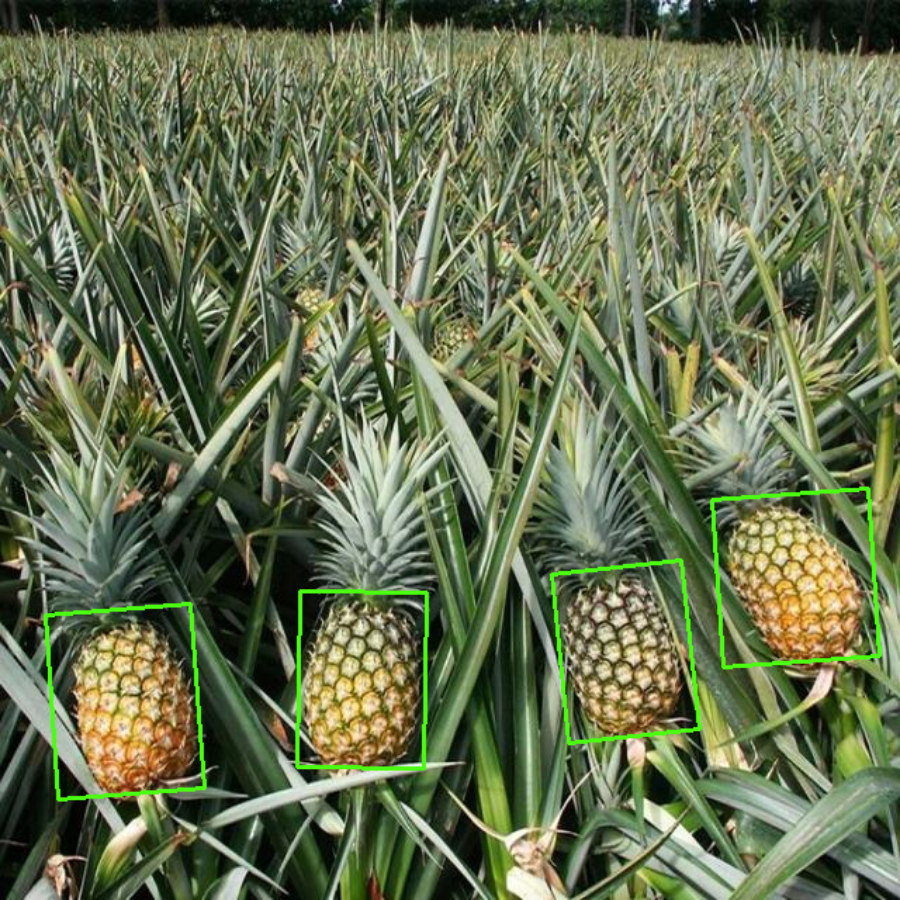

In [ ]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)
sv.cv2_to_pillow(annotated_frame)

In [ ]:
random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

In [ ]:
import argparse
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
from PIL import ImageFont, ImageDraw, Image
import tensorflow as tf
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.keras.models import load_model

In [ ]:
def yolo_boxes_to_corners(box_xy, box_wh):
    """Convert YOLO box predictions to bounding box corners."""
    box_mins = box_xy - (box_wh / 2.)
    box_maxes = box_xy + (box_wh / 2.)

    return tf.keras.backend.concatenate([
        box_mins[..., 1:2],  # y_min
        box_mins[..., 0:1],  # x_min
        box_maxes[..., 1:2],  # y_max
        box_maxes[..., 0:1]  # x_max
    ])


In [ ]:
def yolo_eval(yolo_outputs, image_shape = (720, 1280), max_boxes=10, score_threshold=.6, iou_threshold=.5):
    """
    Converts the output of YOLO encoding (a lot of boxes) to your predicted boxes along with their scores, box coordinates and classes.

    Arguments:
    yolo_outputs -- output of the encoding model (for image_shape of (608, 608, 3)), contains 4 tensors:
                    box_xy: tensor of shape (None, 19, 19, 5, 2)
                    box_wh: tensor of shape (None, 19, 19, 5, 2)
                    box_confidence: tensor of shape (None, 19, 19, 5, 1)
                    box_class_probs: tensor of shape (None, 19, 19, 5, 80)
    image_shape -- tensor of shape (2,) containing the input shape, in this notebook we use (608., 608.) (has to be float32 dtype)
    max_boxes -- integer, maximum number of predicted boxes you'd like
    score_threshold -- real value, if [ highest class probability score < threshold], then get rid of the corresponding box
    iou_threshold -- real value, "intersection over union" threshold used for NMS filtering

    Returns:
    scores -- tensor of shape (None, ), predicted score for each box
    boxes -- tensor of shape (None, 4), predicted box coordinates
    classes -- tensor of shape (None,), predicted class for each box
    """

    # Retrieve outputs of the YOLO model (≈1 line)
    box_xy, box_wh, box_confidence, box_class_probs = yolo_outputs

    # Convert boxes to be ready for filtering functions (convert boxes box_xy and box_wh to corner coordinates)
    boxes = yolo_boxes_to_corners(box_xy, box_wh)

    # Use the function `yolo_filter_boxes` you've implemented to perform Score-filtering with a threshold of score_threshold
    scores, boxes, classes = yolo_filter_boxes(boxes, # Use boxes
                                  box_confidence, # Use box confidence
                                  box_class_probs, # Use box class probability
                                  score_threshold  # Use threshold=score_threshold
                                 )

    # Scale boxes back to original image shape.
    boxes = scale_boxes(boxes, image_shape)

    # Use the function `yolo_non_max_suppression` you've implemented to perform Non-max suppression with
    # maximum number of boxes set to max_boxes and a threshold of iou_threshold
    scores, boxes, classes = yolo_non_max_suppression(scores, # Use scores
                                  boxes, # Use boxes
                                  classes, # Use classes
                                  max_boxes, # Use max boxes
                                  iou_threshold  # Use iou_threshold=iou_threshold
                                 )


    return scores, boxes, classes

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate

In [ ]:
# U-net
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block

    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns:
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation="relu",
                  padding="same",
                  kernel_initializer='he_normal')(inputs)
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation="relu",
                  padding="same",
                  # set 'kernel_initializer' same as above
                  kernel_initializer='he_normal')(conv)

    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
         ### START CODE HERE
        conv = Dropout(rate=dropout_prob)(conv)
         ### END CODE HERE


    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        ### START CODE HERE
        next_layer = MaxPooling2D(pool_size=(2, 2))(conv)
        ### END CODE HERE

    else:
        next_layer = conv

    skip_connection = conv

    return next_layer, skip_connection

In [ ]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    """
    Convolutional upsampling block

    Arguments:
        expansive_input -- Input tensor from previous layer
        contractive_input -- Input tensor from previous skip layer
        n_filters -- Number of filters for the convolutional layers
    Returns:
        conv -- Tensor output
    """

    ### START CODE HERE
    up = Conv2DTranspose(
                 n_filters,    # number of filters
                 3,    # Kernel size
                 strides=2,
                 padding="same")(expansive_input)

    # Merge the previous output and the contractive_input
    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(n_filters,   # Number of filters
                 3,     # Kernel size
                 activation="relu",
                 padding="same",
                 kernel_initializer='he_normal')(merge)
    conv = Conv2D(n_filters,  # Number of filters
                 3,   # Kernel size
                 activation="relu",
                 padding="same",
                  # set 'kernel_initializer' same as above
                 kernel_initializer="he_normal")(conv)
    ### END CODE HERE

    return conv

In [ ]:
def unet_model(input_size=(96, 128, 3), n_filters=32, n_classes=23):
    """
    Unet model

    Arguments:
        input_size -- Input shape
        n_filters -- Number of filters for the convolutional layers
        n_classes -- Number of output classes
    Returns:
        model -- tf.keras.Model
    """
    inputs = Input(input_size)
    # Contracting Path (encoding)
    # Add a conv_block with the inputs of the unet_ model and n_filters
    ### START CODE HERE
    cblock1 = conv_block(inputs, n_filters)
    # Chain the first element of the output of each block to be the input of the next conv_block.
    # Double the number of filters at each new step
    cblock2 = conv_block(cblock1[0], n_filters * 2)
    cblock3 = conv_block(cblock2[0], n_filters * 4)
    cblock4 = conv_block(cblock3[0], n_filters * 8, dropout_prob=0.3) # Include a dropout_prob of 0.3 for this layer
    # Include a dropout_prob of 0.3 for this layer, and avoid the max_pooling layer
    cblock5 = conv_block(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    ### END CODE HERE

    # Expanding Path (decoding)
    # Add the first upsampling_block.
    # Use the cblock5[0] as expansive_input and cblock4[1] as contractive_input and n_filters * 8
    ### START CODE HERE
    ublock6 = upsampling_block(cblock5[0], cblock4[1],  n_filters * 8)
    # Chain the output of the previous block as expansive_input and the corresponding contractive block output.
    # Note that you must use the second element of the contractive block i.e before the maxpooling layer.
    # At each step, use half the number of filters of the previous block
    ublock7 = upsampling_block(ublock6, cblock3[1],  n_filters * 4)
    ublock8 = upsampling_block(ublock7, cblock2[1],  n_filters * 2)
    ublock9 = upsampling_block(ublock8, cblock1[1],  n_filters)
    ### END CODE HERE

    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 # set 'kernel_initializer' same as above exercises
                 kernel_initializer='he_normal')(ublock9)

    # Add a Conv2D layer with n_classes filter, kernel size of 1 and a 'same' padding
    ### START CODE HERE
    conv10 = Conv2D(n_classes, 1, padding="same")(conv9)
    ### END CODE HERE

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [ ]:
img_height = 96
img_width = 128
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))

In [ ]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])